# Lecture 10 Introduction to Machine Learning and Linear Regression

## Motivating Example: Single-variable (1D) Linear Regression

### **Problem**
Given the *training dataset* $(x^{(i)}\in\mathbb{R},y^{(i)}\in\mathbb{R}), i= 1,2,..., N$, we want to find the linear function $$y\approx f(x)=wx +b$$ that fits the relations between $x^{(i)}$ and $y^{(i)}$. So that given any new $x^{test}$ in the **test** dataset, we can make the prediction $$y^{pred} = w x^{test}+b$$

### Training the model

- With the training dataset, define the loss function $L(w,b)$ of parameter $w$ and $b$, which is also called **mean squared error** (MSE) $$L(w,b)=\frac{1}{N}\sum_{i=1}^N\big(\hat{y}^{(i)}-y^{(i)}\big)^2=\frac{1}{N}\sum_{i=1}^N\big((wx^{(i)}+b)-y^{(i)}\big)^2,$$ where $\hat{y}^{(i)}$ denotes the predicted value of y at $x^{(i)}$, i.e. $\hat{y}^{(i)} = wx^{(i)}+b$.


- Then find the minimum of loss function -- note that this is the quadratic function of $w$ and $b$, and we can analytically solve $\partial_{w}L = \partial_{b}L =0$, and yields

$$ w^* =\frac{\sum_{i=1}^{N}(x_{i}-\bar{x})(y_{i}-\bar{y})}{\sum_{i=1}^{N}(x_{i}-\bar{x})^{2}} = \frac{\frac{1}{N}\sum_{i=1}^{N}(x_{i}-\bar{x})(y_{i}-\bar{y})}{\frac{1}{N}\sum_{i=1}^{N}(x_{i}-\bar{x})^{2}} = \frac{\text{Cov}(X,Y)}{\text{Var}(X)},$$

$$ b^* = \bar{y}  - w^*\bar{x},$$

where $\bar{x}$ and $\bar{y}$ are the mean of $x$ and of $y$, and $\text{Cov}(X,Y)$ denotes the estimated covariance (or called sample covariance) between $X$ and $Y$ (a little difference with what you learned in statistics is that we have the normalization factor $1/N$ instead of $1/(N-1)$ here), and $\text{Var}(Y)$ denotes the sample variance of $Y$ (the normalization factor is still $1/N$). This is just about convention -- in statistics, they pursue for unbiased estimator.

### Evaluating the model

- MSE: The smaller MSE indicates better performance
- R-Squared: The larger $R^{2}$ (closer to 1) indicates better performance. Compared with MSE, R-squared is **dimensionless**, not dependent on the units of variable. 

$$R^{2} = 1 - \frac{\sum_{i=1}^{N}(y^{(i)}-\hat{y}^{(i)})^{2}}{\sum_{i=1}^{N}(y^{(i)}-\bar{y})^{2}} = 1 - \frac{\frac{1}{N}\sum_{i=1}^{N}(y^{(i)}-\hat{y}^{(i)})^{2}}{\frac{1}{N}\sum_{i=1}^{N}(y^{(i)}-\bar{y})^{2}} = 1 - \frac{\text{MSE}}{\text{Var}(Y)}$$

In [1]:
import numpy as np

class MyLinearRegression1D:
    '''
    The single-variable linear regression estimator -- writing in the style of sklearn package
    '''
        
    def fit(self, x, y):
        '''
        Determine the optimal parameters w, b for the input data x and y
        
        Parameters
        ----------
           x : 1D numpy array with shape (n_samples,) from training data
           y : 1D numpy array with shape (n_samples,) from training data
        
        Returns
        -------
        self : returns an instance of self, with new attributes slope w (float) and intercept b (float)
         '''
        
        cov_mat = np.cov(x,y,bias=True) # covariance matrix, bias = True makes the factor is 1/N -- but it doesn't matter actually, since the factor will be cancelled
        self.w = cov_mat[0,1] / cov_mat[0,0] # the (0,1) element is COV(X,Y) and (0,0) element is Var(X). (1,1) is Var(Y)
        self.b =  np.mean(y)-self.w * np.mean(x)
        
    def predict(self,x):
        '''
        Predict the output values for the input value x, based on trained parameters
        
        Parameters
        ----------
           x : 1D numpy array from training or test data 
        
        Returns
        -------
        returns 1D numpy array of same shape as input, the predicted y value of corresponding x
        '''
        
        return self.w*x+self.b
    
    def score(self, x, y):
        '''
        Calculate the R-squared on the dataset with input x and y
        
        Parameters
        ----------
           x : 1D numpy array with shape (n_samples,) from training or test data
           y : 1D numpy array with shape (n_samples,) from training or test data
        
        Returns
        -------
        returns float, the R^2 value
        '''
        
        y_hat = self.predict (x) # predicted y
        mse = np.mean((y-y_hat)**2) # mean squared error
        return 1- mse / np.var(y) # return R-squared
    
    

In [2]:
from sklearn import datasets
X, y = datasets.load_boston(return_X_y=True)

In [3]:
X.shape

(506, 13)

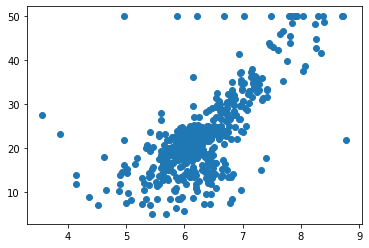

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X[:,5],y)

In [5]:
lreg = MyLinearRegression1D() # initialize the instance of one estimator
help(lreg)

Help on MyLinearRegression1D in module __main__ object:

class MyLinearRegression1D(builtins.object)
 |  The single-variable linear regression estimator -- writing in the style of sklearn package
 |  
 |  Methods defined here:
 |  
 |  fit(self, x, y)
 |      Determine the optimal parameters w, b for the input data x and y
 |      
 |      Parameters
 |      ----------
 |         x : 1D numpy array with shape (n_samples,) from training data
 |         y : 1D numpy array with shape (n_samples,) from training data
 |      
 |      Returns
 |      -------
 |      self : returns an instance of self, with new attributes slope w (float) and intercept b (float)
 |  
 |  predict(self, x)
 |      Predict the output values for the input value x, based on trained parameters
 |      
 |      Parameters
 |      ----------
 |         x : 1D numpy array from training or test data 
 |      
 |      Returns
 |      -------
 |      returns 1D numpy array of same shape as input, the predicted y value of 

In [6]:
lreg.fit(X[:,5],y)

In [7]:
lreg.score(X[:,5],y)

0.4835254559913341

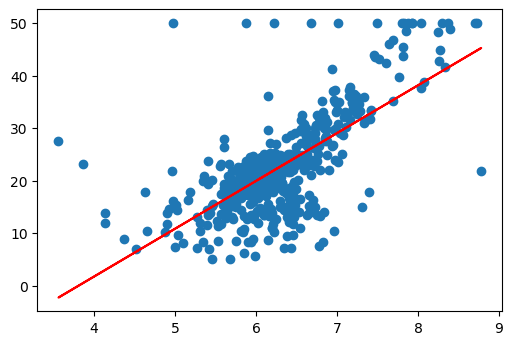

In [8]:
fig = plt.figure(dpi = 100)
plt.scatter(X[:,5],y)
plt.plot(X[:,5],lreg.predict(X[:,5]),'r')

In [9]:
from sklearn import linear_model # compare with the scikit learn package
lreg_sklearn = linear_model.LinearRegression()
lreg_sklearn.fit(X[:,5].reshape(-1,1),y) #only accept 2D-array as x

LinearRegression()

In [10]:
print(lreg.w,lreg.b)
print(lreg_sklearn.coef_, lreg_sklearn.intercept_)

9.102108981180306 -34.67062077643854
[9.10210898] -34.67062077643857


In [11]:
lreg_sklearn.score(X[:,5].reshape(-1,1),y)

0.48352545599133423

In [12]:
help(lreg_sklearn)

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtracting the mean

**(Materials in Midterm Exam end here)**
___

##  Overview of the whole picture
Possible hierarchies of machine learning concepts:

- **Problems**: Supervised Learning(Regression,Classification), Unsupervised Learning (Dimension Reduction, Clustering), Reinforcement Learning (Not covered in this course)


- **Models**: 
    - (Supervised) Linear Regression, Logistic Regression, K-Nearest Neighbor (kNN) Classification/Regression, Decision Tree, Random Forest, Support Vector Machine, Ensemble Method, Neural Network...
    - (Unsupervised) K-means,Hierachical Clustering, Principle Component Analysis, Manifold Learning (MDS, IsoMap, Diffusion Map, tSNE), Auto Encoder...
    

- **Algorithms**: Gradient Descent, Stochastic Gradient Descent (SGD), Back Propagation (BP),Expectation–Maximization (EM)...
    
    
For the same **problem**, there may exist multiple **models** to discribe it. Given the specific **model**, there might be many different **algorithms** to solve it.

Why there is so much diversity? The following two fundamental principles of machine learning may provide theoretical insights.

**[Bias-Variance Trade-off](https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229)**: Simple models -- large bias, low variance. Complex models -- low bias, large variance

**[No Free Lunch Theorem](https://analyticsindiamag.com/what-are-the-no-free-lunch-theorems-in-data-science/#:~:text=Once%20Upon%20A%20Time,that%20they%20brought%20a%20drink)**: (in plain language) There is no one model that works best for every problem. (more quantitatively) Any two models are equivalent when their performance averaged across all possible problems. --Even true for [optimization algorithms](https://en.wikipedia.org/wiki/No_free_lunch_in_search_and_optimization).

## Linear Regression

Recall the basic task of **supervised learning**: given the *training dataset* $(x^{(i)},y^{(i)}), i= 1,2,..., N$ with $y^{(i)}\in \mathbb{R}^{q}$ (for simplicity, assume $q=1$) denotes the *labels*, the supervised learning aims to find a mapping $y\approx\mathbf{f}(x):\mathbb{R}^{p}\to\mathbb{R}$ that we can use it to make predictions on the test dataset.

### Model Setup

#### Model assumption 1: Linear Mapping Assumption.

$$y\approx\mathbf{f}(x)=\beta_{0}+\beta_{1}x_{1}+..+\beta_{p}x_{p} = \tilde{x}\beta,$$  
    $$\tilde{x}=(1,x_{1},..,x_{p})\in\mathbb{R}^{1\times (p+1)},\beta = (\beta_{0},\beta_{1},..,\beta_{p})^{T}\in\mathbb{R}^{(p+1)\times 1}.$$


Here $\beta$ is called regression coefficients, and $\beta_{0}$ specially referred to intercept. 

Using the whole training dataset, we can write as 

$$Y=\left(
 \begin{matrix}
   y^{(1)}\\
   y^{(2)} \\
   \cdots \\
   y^{(N)}
  \end{matrix} 
\right)\approx\left(
  \begin{matrix}
   \mathbf{f}(x^{(1)})\\
   \mathbf{f}(x^{(2)})\\
   \cdots \\
   \mathbf{f}(x^{(N)})
  \end{matrix} 
\right)=\left(
  \begin{matrix}
   \tilde{x}^{(1)}\beta\\
   \tilde{x}^{(2)}\beta\\
   \cdots \\
   \tilde{x}^{(N)}\beta
  \end{matrix} 
\right)=\left(
  \begin{matrix}
   \tilde{x}^{(1)}\\
   \tilde{x}^{(2)}\\
   \cdots \\
   \tilde{x}^{(N)}
  \end{matrix} 
\right)\beta = \tilde{X}\beta,
$$

where 
$$
\tilde{X}=\left(
  \begin{matrix}
   1& x_{1}^{(1)} & \cdots & x_{p}^{(1)}\\
   1& x_{1}^{(2)} & \cdots & x_{p}^{(2)}\\
   \cdots \\
   1& x_{1}^{(N)} & \cdots & x_{p}^{(N)}
  \end{matrix} 
\right)
$$
is also called the augmented data matrix.

#### Model assumption 2: Gaussian Residual Assumption ($L^{2}$ loss assumption)
$$y^{(i)}=\tilde{x}^{(i)}\beta+\epsilon^{(i)}, i = 1,2,.., N$$
The residuals or errors $\epsilon^{(i)}$ are **assumed** as independent Gaussian random variables with identical distribution $\mathcal{N}(0,\sigma^{2})$ which has mean 0 and standard deviation $\sigma$.

From the density function of Gaussian distribution, the prabability to observe $\epsilon^{(i)}$ within the small interval $[z,z+\Delta z]$ is roughly $$\frac{1}{\sqrt{2\pi}\sigma}\exp({-\frac{z^2}{2\sigma^2}})\Delta z.$$

From the data, we know indeed $z=y^{(i)}-\tilde{x}^{(i)}\beta$. Therefore, given $x^{(i)}$ as fixed, the probability density (likelihood) to observe $y^{(i)}$ is roughly $$l(y^{(i)}|x^{(i)},\beta)=\frac{1}{\sqrt{2\pi}\sigma}\exp({-\frac{(y^{(i)}-\tilde{x}^{(i)}\beta)^2}{2\sigma^2}}).$$

Using the *independence* assumption, the overall likelihood to observe the response data $y^{i}(i=1,2,...,N)$ is 

$$\mathcal{L}(y^{(i)},1\leq i\leq N|\beta,x^{(i)})=\prod_{i=1}^{N}l(y^{(i)}|x^{(i)},\beta)$$

The famous **Maximum Likelihood Estimation** theory in statistics **assumes** that we aim to find the unknown parameter $\beta$ that maximizes the $\mathcal{L}(\beta;x^{(i)},y^{(i)},1\leq i\leq N)$ by treating $x^{(i)}$ and $y^{(i)}$ as fixed numbers. 

Equivalently, as the function of $\beta$, we can maximize $$\ln \mathcal{L}= \sum_{i=1}^{N}\ln l(y^{(i)}|\beta,x^{(i)}).$$ 

By removing the constants, we finally arrives at the **minimization** problem of $L^{2}$ loss function 
$$L(\beta)=\sum_{i=1}^{N}(y^{(i)}-\tilde{x}^{(i)}\beta)^{2}= ||Y-\tilde{X}\beta||_{2}^2.$$

The optimal parameter 
$$\hat{\beta}=\text{argmin} L(\beta)$$
is also called the ordinary least square (OLS) estimator in statistics community.

We also have the prediction $$\hat{y}^{(i)}=\tilde{x}^{(i)}\hat{\beta}.$$

### Algorithm: Normal Equation

To solve the critical points, we have $\nabla L(\beta)=0$.
$$
\begin{aligned}
\frac{\partial L}{\partial \beta_{0}}&=2\sum_{i=1}^{N}(\tilde{x}^{(i)}\beta-y^{(i)})=0,\\
\frac{\partial L}{\partial \beta_{k}}&=2\sum_{i=1}^{N} x_{k}^{(i)}(\tilde{x}^{(i)}\beta-y^{(i)})=0,\quad k=1,2,..,p.
\end{aligned}
$$

In Matrix form, it can be expressed as (left as exercise) $$\tilde{X}^{T}\tilde{X}\beta=\tilde{X}^{T}Y,$$

also called the **normal equation** of linear regression. Then the OLS estimator can be solved as $$\hat{\beta}=(\tilde{X}^{T}\tilde{X})^{-1}\tilde{X}^{T}Y.$$

**[Geometrical Interpretation](https://en.wikipedia.org/wiki/Ordinary_least_squares)**

Denote $\tilde{X}=(\tilde{X}_{0},\tilde{X}_{1},..,\tilde{X}_{p})$, then $\tilde{X}\beta=\sum_{k=0}^{p}\beta_{k}\tilde{X}_{k}$. We require that the residual $Y-\tilde{X}\beta$ is vertical to the plane spanned by $\tilde{X}_{k}$, which yields $$\tilde{X}_{k}^{T}(Y-\tilde{X}\beta)=0,\quad k = 0,1,...,p$$

## Extensions: Regularization, Ridge Regression and LASSO

Recall the likelihood function -- we interpret it as the probability of observing the response data, given the parameter $\beta$ as fixed, i.e. conditional probability
$$\mathcal{P}(y^{(i)},1\leq i\leq N|\beta,x^{(i)})=\prod_{i=1}^{N}l(y^{(i)}|x^{(i)},\beta)$$

Now we take a bayesian approach -- assume $\beta$ is the random variable with **prior distirbution** $\mathcal{P}(\beta)$. Then the **posterior distribution** of $\beta$ given the data is  $$\mathcal{P}(\beta|x^{(i)},y^{(i)},1\leq i\leq N)\propto \mathcal{P}(\beta)\mathcal{P}(y^{(i)},1\leq i\leq N|\beta,x^{(i)}).$$

The **Bayesian** estimation aims to maximaze the posterior distribution. Note that 

$$\text{argmax}_{\beta}\mathcal{P}(\beta|x^{(i)},y^{(i)},1\leq i\leq N)=\text{argmax}_{\beta}\ln\mathcal{P}(\beta|x^{(i)},y^{(i)},1\leq i\leq N)$$

- Case 1: The prior distribution $\mathcal{P}(\beta_{i}=x)\propto \exp(-x^{2})$ is Gaussian-like, and different $\beta_{i}$ are independent. Now the minimization problem becomes 

    $$\min_{\beta} ||Y-\tilde{X}\beta||_{2}^2+\lambda||\beta||_{2}^{2}.$$

here $||\beta||_{2}^{2}=\sum_{i=0}^{p}\beta_{i}^{2}.$
    This is called **Ridge Regression**. 
    
Here $\lambda$ is the adjustable parameter in algorithm --  its choice is empirical while sometimes very important for model performance (where the word "alchemy" arises in machine learning!!!)


- Case 2: The prior distribution $\mathcal{P}(\beta_{i}=x)\propto \exp(-|x|)$ is double-exponential like, and different $\beta_{i}$ are independent. Now the minimization problem becomes 

    $$\min_{\beta} ||Y-\tilde{X}\beta||_{2}^2+\lambda\sum_{i=0}^{p}|\beta_{i}|$$
    
    This is called [**LASSO Regression**](https://en.wikipedia.org/wiki/Lasso_(statistics)).
    
In general, these additional terms are called the **regularization terms**. In statistics, regularization is equivalent to Bayesian prior.

Algorithm consideration: The optimization for ridge regression is similar to OLS -- try to derive the analytical solution your self. The optimization for LASSO is [non-trival](https://www.cs.ubc.ca/~schmidtm/Documents/2005_Notes_Lasso.pdf) and is the important topic in convex optimization. 

## Example: Diabetes Dataset

We use the [scikit-learn package](https://scikit-learn.org/stable/index.html) to load the data and run regression. More tutorials about linear models can be [found here](https://scikit-learn.org/stable/modules/linear_model.html).

Data from [this paper](https://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf) by Professor [Robert Tibshirani et al](https://statweb.stanford.edu/~tibs/index.html).

In [ ]:
from sklearn import datasets
X,y= datasets.load_diabetes(return_X_y = True)

In [ ]:
help(datasets.load_diabetes)

Generate the training and test dataset by random splitting

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
print(X_train.shape)
print(y_test.shape)

In [ ]:
help(train_test_split)

Ordinary Least Square (OLS) Linear Regression

In [ ]:
from sklearn import linear_model
reg_ols = linear_model.LinearRegression()
reg_ols.fit(X_train,y_train)

In [ ]:
dir(reg_ols)

In [ ]:
reg_ols.coef_

In [ ]:
y_pred_ols = reg_ols.predict(X_test)

Evaluation:
   - Mean Square Error (MSE) -- the lower, the better (in test data):  $\frac{1}{N}\sum_{i=1}^{N}(y^{(i)}-\hat{y}^{(i)})^{2}$
   - R-squared (coefficient of determination, $R^{2}$) -- the larger, the better (in test data): $1 - \frac{\sum_{i=1}^{N}(y^{(i)}-\hat{y}^{(i)})^{2}}{\sum_{i=1}^{N}(y^{(i)}-\bar{y})^{2}}$

In [ ]:
from sklearn.metrics import mean_squared_error
mse_ols = mean_squared_error(y_test, y_pred_ols)
R2_ols =  reg_ols.score(X_test,y_test)
print(mse_ols,R2_ols)

In [ ]:
reg_ridge = linear_model.Ridge(alpha=.02)
reg_ridge.fit(X_train,y_train)
print(reg_ridge.coef_)
y_pred_ridge = reg_ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
R2_ridge =  reg_ridge.score(X_test,y_test)
print(mse_ridge,R2_ridge)

In [ ]:
reg_lasso = linear_model.Lasso(alpha=.05)
reg_lasso.fit(X_train,y_train)
print(reg_lasso.coef_)

y_pred_lasso = reg_lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
R2_lasso =  reg_lasso.score(X_test,y_test)
print(mse_lasso,R2_lasso)

In [ ]:
print(reg_ols.score(X_train,y_train))
print(reg_ridge.score(X_train,y_train))
print(reg_lasso.score(X_train,y_train))

By definition, OLS has the smallest MSE (largest R-squared) on **training dataset**. What about on the test dataset?

In [ ]:
import numpy as np
train_errors = list()
test_errors = list()
alphas = np.logspace(-5, -1, 20)
for alpha in alphas:
    reg_lasso.set_params(alpha=alpha) # change the parameter of reg_lasso
    reg_lasso.fit(X_train, y_train)
    train_errors.append(reg_lasso.score(X_train, y_train))
    test_errors.append(reg_lasso.score(X_test, y_test))

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(dpi=100)
plt.semilogx(alphas,train_errors,label = 'train R2')
plt.semilogx(alphas,test_errors,label = 'test R2')
plt.xlabel('alpha')
plt.legend()

### [Cross Validation](https://scikit-learn.org/stable/modules/cross_validation.html)

In [ ]:
from sklearn.model_selection import cross_val_score
scores_lasso = cross_val_score(reg_lasso, X, y, cv=10)
scores_ridge = cross_val_score(reg_ridge, X, y, cv=10)
scores_ols = cross_val_score(reg_ols, X, y, cv=10)

In [ ]:
print(scores_lasso)
print(scores_ridge)
print(scores_ols)

In [ ]:
help(cross_val_score)

In [ ]:
import pandas as pd
import seaborn as sns
scores_all = pd.DataFrame({"lasso": scores_lasso,"ols": scores_ols, "ridge":scores_ridge})
scores_all

Besides mean and standard deviation, we can also use the [boxplot](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51) to visualize the results.

In [ ]:
fig, ax = plt.subplots(dpi=100)
sns.boxplot(data = scores_all)